**Goal**: run LintQ on new dataset where we can compute the recall of the method.

In [2]:
import project_path
from rdlib import *  # this imports the base libraries

In [21]:
PATH_WARNINGS_SARIF = '../data/analysis_results/QuantumBugs100_app_2023-06-12/codeql_2023-06-12_12-10-25/data.sarif'
PATH_WARNINGS_CSV_NEW = PATH_WARNINGS_SARIF.replace(".sarif", ".csv")

BUG_METADATA_PATH = '../data/datasets/QuantumBugs100/dataset_summary.csv'

RELEVANT_DETECTORS = {
    'ql-double-measurement': 'DoubleMeas',
    'ql-operation-after-measurement': 'OpAfterMeas',
    'ql-measure-all-abuse': 'MeasAllAbuse',
    'ql-incompatible-composition': 'IncompCompose',
    'ql-ungoverned-composition': 'UngovCompose',
    'ql-ghost-composition': 'GhostCompose',
    'ql-unmeasurable-qubits': 'InsuffClasReg',
    'ql-oversized-circuit': 'OversizedCircuit',
    'ql-op-after-optimization': 'OpAfterTransp',
}

In [8]:
# CREATE THE CSV VERSION OF THE FILE WITH WARNINGS
# if the PATH_WARNINGS_CSV_NEW does not exist, create it
if not os.path.exists(PATH_WARNINGS_CSV_NEW):
    ! sarif csv --output {PATH_WARNINGS_CSV_NEW} {PATH_WARNINGS_SARIF}
else:
    print("File already exists: ", PATH_WARNINGS_CSV_NEW)


# LOAD WARNINGS CONVERTED IN JSON FORMAT
df_warnings = pd.read_csv(PATH_WARNINGS_CSV_NEW)
df_warnings['rule'] = df_warnings['Code'].apply(lambda e: e.split(" ")[0])
df_warnings['unique_id'] = df_warnings['Location'].apply(lambda e: e.split(".")[0])

# KEEP ONLY RELEVANT DETECTORS
df_warnings = df_warnings[df_warnings['rule'].isin(RELEVANT_DETECTORS.keys())]

File already exists:  ../data/analysis_results/QuantumBugs100_app_2023-06-12/codeql_2023-06-12_12-10-25/data.csv


In [24]:
df_metadata = pd.read_csv(BUG_METADATA_PATH)
id_from_bugs4q = df_metadata[df_metadata['sampling_method'] == 'Bugs4Q-112021']['id'].values
n_bugs_from_bugs4q = len(id_from_bugs4q)
print("Number of bugs from Bugs4Q: ", n_bugs_from_bugs4q)

Number of bugs from Bugs4Q:  42


In [9]:
df_warnings.head()

,Tool,Severity,Code,Location,Line,rule,unique_id
0,CodeQL,warning,ql-ghost-composition Ghost composition at loca...,STE-31508_buggy.py,8,ql-ghost-composition,STE-31508_buggy
1,CodeQL,warning,ql-measure-all-abuse measure_all() on the circ...,STE-20750_buggy.py,5,ql-measure-all-abuse,STE-20750_buggy
2,CodeQL,warning,ql-measure-all-abuse measure_all() on the circ...,TER-6571_buggy.py,8,ql-measure-all-abuse,TER-6571_buggy
3,CodeQL,warning,ql-operation-after-measurement Operation 'cx' ...,STO-60918011_buggy.py,19,ql-operation-after-measurement,STO-60918011_buggy
4,CodeQL,warning,ql-operation-after-measurement Operation 'cz' ...,STO-60918011_buggy.py,20,ql-operation-after-measurement,STO-60918011_buggy


In [27]:
# add column for provenance, i.e., the dataset from which the bug comes from
df_warnings['simple_id'] = df_warnings['unique_id'].apply(lambda e: e.replace("_buggy", ""))
df_warnings['provenance'] = df_warnings['simple_id'].apply(lambda e: 'Bugs4Q' if e in id_from_bugs4q else 'New')

Text(0.5, 1.0, 'New Dataset 48 Bugs (ex Bugs4Q)')

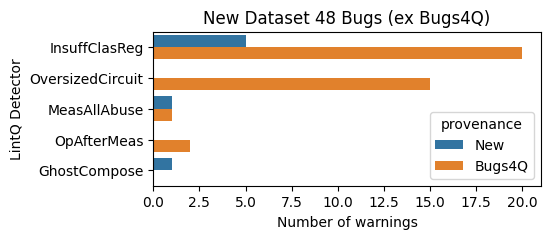

In [28]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(5, 2))
df = df_warnings.copy()
# rename the rules with the short names
df['rule'] = df['rule'].apply(lambda e: RELEVANT_DETECTORS[e])
sns.countplot(
    data=df,
    y='rule',
    order=df['rule'].value_counts().index,
    hue='provenance',
    ax=ax
)
ax.set_xlabel("Number of warnings")
ax.set_ylabel("LintQ Detector")
ax.set_title("New Dataset 48 Bugs (ex Bugs4Q)")

Number of bugs from Bugs4Q:  42
